<a href="https://colab.research.google.com/github/kacsar11/Uczenie_maszynowe/blob/ZAD_1/CASE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install scikit-plot

In [74]:
import pandas as pd
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [ ]:
credit_card = '/content/sample_data/creditcard.csv'
df = pd.read_csv(credit_card)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
value_counts = df['Class'].value_counts()
print(value_counts)

0    284315
1       492
Name: Class, dtype: int64


In [ ]:
df_cleaned = df.dropna()

In [ ]:
X = df_cleaned.drop(columns='Class')
y = df_cleaned['Class']

In [ ]:
X_train, X_test = train_test_split(X,test_size=0.33, random_state=42)
y_train, y_test = train_test_split(y,test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(190820, 30) (93987, 30)


In [ ]:
print(y_train.shape, y_test.shape)

(190820,) (93987,)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

confusion_matrix(y_test, y_pred)

Accuracy: 0.9985955504484663
Precision: 1.0
Recall: 0.11409395973154363


array([[93838,     0],
       [  132,    17]])

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_oversamp, y_oversamp = oversampler.fit_resample(X_train, y_train)
df_oversamp = pd.concat([y_oversamp, X_oversamp], axis=1)

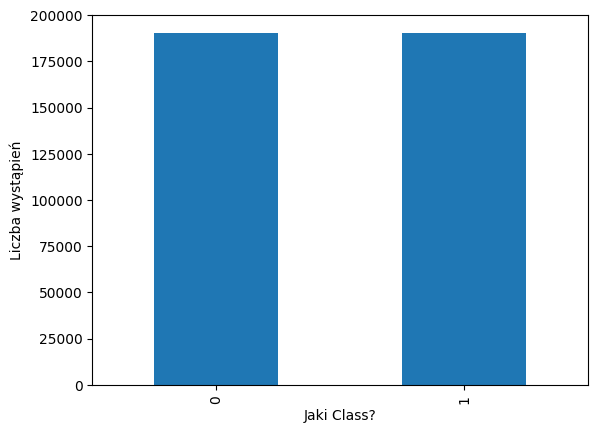

In [ ]:
df_oversamp['Class'].value_counts().plot(kind= 'bar')
plt.xlabel("Jaki Class?")
plt.ylabel("Liczba wystąpień");

In [ ]:
X_o = df_oversamp.drop(columns='Class')
y_o = df_oversamp['Class']

In [ ]:
X_train_o, X_test_o = train_test_split(X_o,test_size=0.33, random_state=42)
y_train_o, y_test_o = train_test_split(y_o,test_size=0.33, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_o, y_o)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

confusion_matrix(y_test, y_pred)

Accuracy: 0.9979039654420292
Precision: 0.2857142857142857
Recall: 0.21476510067114093


array([[93758,    80],
       [  117,    32]])

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = make_pipeline(over,under,model)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     93838
           1       0.01      0.50      0.02       149

    accuracy                           0.93     93987
   macro avg       0.51      0.71      0.49     93987
weighted avg       1.00      0.93      0.96     93987



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

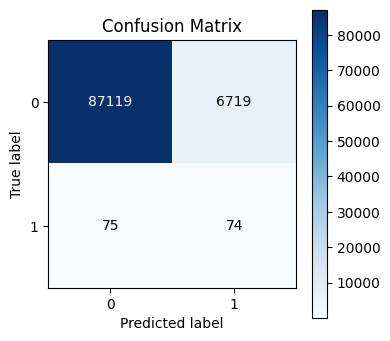

In [72]:
cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(4, 4))

In [79]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.67      0.62      0.64       149

    accuracy                           1.00     93987
   macro avg       0.83      0.81      0.82     93987
weighted avg       1.00      1.00      1.00     93987



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

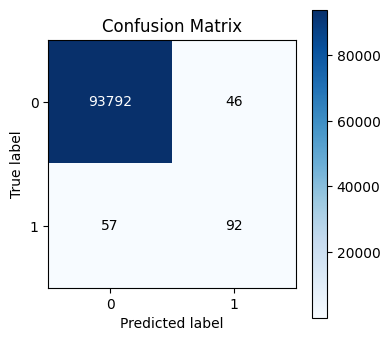

In [81]:
cm = confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(4, 4))

In [100]:
wagi_1 = {0:2,1:1}
model = LogisticRegression(solver='lbfgs', class_weight=wagi_1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.77      0.53      0.63       149

    accuracy                           1.00     93987
   macro avg       0.89      0.76      0.81     93987
weighted avg       1.00      1.00      1.00     93987



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

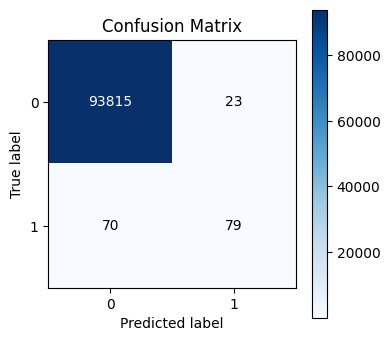

In [102]:
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(4, 4))

In [108]:
wagi_2 = {0:3.5,1:0.75}
model = LogisticRegression(solver='lbfgs', class_weight=wagi_1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.77      0.53      0.63       149

    accuracy                           1.00     93987
   macro avg       0.89      0.76      0.81     93987
weighted avg       1.00      1.00      1.00     93987



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

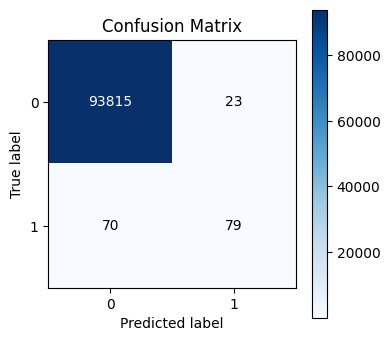

In [106]:
skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(4, 4))